## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  文华虎
+ 学号  0165180

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random

In [2]:
#导入数据
df = csv.reader(open('CEPS.csv','r'))

cog = []
sweight = []

for line in df:
    cog.append(line[10])
    sweight.append(line[6])

cog.pop(0)
sweight.pop(0)

var1 = []
var2 = []
#随机抽取1000个样本并将抽取过程重复30次
for i in range(0,30):
    cog_1000 = random.sample(cog,1000)
    sweight_1000 = random.sample(sweight,1000)

    sum_cog = 0.0
    sum_sweight = 0.0
#将每次抽取均值存入var1和var2中
    for str in cog_1000:
        num = float(str)
        sum_cog += num
    cog_mean = sum_cog / 1000
    var1.append(cog_mean)
    

    for str in sweight_1000:
        num = float(str)
        sum_sweight += num
    sweight_mean = sum_sweight / 1000
    var2.append(sweight_mean)                                                  

print(var1)        
print(var2)


[0.020070788993965874, 0.0073769872906851094, 0.0033909896635449677, 0.00951680239127028, 0.0013541917708934715, 0.005110333924265481, -0.0394145681277732, -0.03207681300246621, 0.0462870393041521, -0.02968188077677036, -0.02722394158353558, 0.012657074154936717, 0.04496711284510104, -0.023844973342551402, -0.02146450897678724, -0.053162651348975416, -0.045421932060387964, 0.05284301531314856, 0.032081993154948606, 0.023106544804235463, -0.046934812490828384, -0.03233855234959624, 0.0004041624737437859, -0.01612678159098137, -0.022072192809893726, 0.0018797493076417328, 0.009934386088163634, 0.03749833425111138, -0.03965715814003488, 0.04333065148210157]
[1583.72279404068, 1542.3649393997193, 1664.3040993270874, 1594.848680862427, 1663.0348927459718, 1680.3331264190674, 1599.370739490509, 1642.2030038757325, 1644.6196063423156, 1657.9223609809876, 1564.6322930984497, 1627.7608356933597, 1570.6479411315918, 1681.407027385712, 1671.6852932128907, 1616.614616607666, 1618.8284677009583, 16

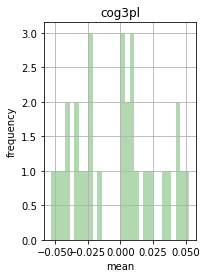

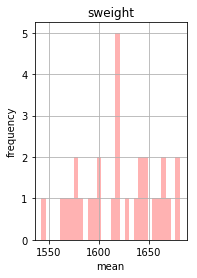

In [3]:
#绘制图表
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.hist(var1, bins = 30, alpha = 0.3, color = 'g', label = ['var1'])
plt.grid(True)
plt.xlabel('mean')
plt.ylabel('frequency')
plt.title('cog3pl')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.hist(var2, bins = 30, alpha = 0.3, color = 'r', label = ['var2'])
plt.grid(True)
plt.xlabel('mean')
plt.ylabel('frequency')
plt.title('sweight')
plt.show()

In [4]:
#计算均值的均值和标准误
sum_var1 = 0
for float in var1:
    sum_var1 += float
mean_var1 = sum_var1/30
print('cog3pl的均值为: %s'%mean_var1)
std_var1 = np.std(var1)
print('cog3pl的标准差为: %s'%std_var1)

sum_var2 = 0
for float in var2:
    sum_var2 += float
mean_var2 = sum_var2/30
print('sweight的均值为： %s'%mean_var2)
std_var2 = np.std(var2)
print('sweight的标准差为: %s'%std_var2)

cog3pl的均值为: -0.002587020312889073
cog3pl的标准差为: 0.0306293731581
sweight的均值为： 1619.9350003751124
sweight的标准差为: 37.0162509343


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
import statsmodels.formula as smf
from statsmodels.formula.api import ols,glm

In [87]:
sentinels = {'c12': [' '], 'b30': [' '],'b32':[' '],'b35':[' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)

D:\python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,177,179,180,181,182,183,184,188,191,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
data=pd.DataFrame({'x1':df.b30,
                  'x2':df.b32,
                  'x3':df.b35,
                  'y':df.c12})
data=data.dropna(axis=0,how='any')

In [89]:
#使用最小二乘法进行线性回归
my_formula = 'y ~ x1 + x2 + x3'
lm = ols(my_formula,data=data).fit()

In [90]:
#结果总览
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     3026.
Date:                Sat, 29 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:37:13   Log-Likelihood:                -25756.
No. Observations:               19168   AIC:                         5.152e+04
Df Residuals:                   19164   BIC:                         5.155e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.7555      0.045     83.858      0.0

In [91]:
#输出F统计量和P值
print("\nF-statistic:%.1f   P-value:%.2f"%(lm.fvalue,lm.f_pvalue))


F-statistic:3025.9   P-value:0.00


In [92]:
#输出各自变量的系数
print("\nCoefficients:\n%s"%lm.params)


Coefficients:
Intercept    3.755470
x1          -0.575898
x2          -0.148825
x3           0.321102
dtype: float64


In [19]:
·模型拟合指标：
被解释变量：Y→“目前的成绩在班里的水平”
因变量：X1→“父母对学业成绩的要求”
        X2→“对于父母期望感到的压力程度”
        X3→“父母对于自己未来是否有信心”

·模型的显著性检验结果：
R²=0.321 说明模型拟合结果较差。
P值接近于0，说明自变量对被解释变量有显著影响。

·变量的系数：
X1的系数为-0.5759，X2的系数为-0.1488，与因变量呈负相关。
X3的系数为0.3211，与因变量呈正相关。

·各系数的显著性检验结果：
X1,X2,X3的P值均小于0.05，说明它们的影响都是显著的。

·对模型结果的解释：
线性回归模型为Y=-0.5759X1-0.1488X2+0.3211X3+3.7555
X1每变动一个单位，因变量变动0.5759个单位；X2每变动一个单位，因变量变动0.1488个单位；X3每变动一个单位，因变量变动0.3211个单位。
这三个自变量中，家庭经济条件对学生目前的成绩影响最大。